# Análise Exploratória de Violações de Dados

# Introdução

Olá. Meu nome é Caio.

Está é a minha primeira análise de dados documentada.

Estarei analisando um dataset que contém uma compilação de dados de diversas fontes diferentes sobre violações de dados de empresas.

Fonte: Kaggle (https://www.kaggle.com/datasets/thedevastator/data-breaches-a-comprehensive-list)

Sou mente aberta, então sinta-se livre para realizar críticas construtivas.

Boa leitura! :)

# Bibliotecas

Estarei utilizando as bibliotecas
* pandas
* numpy
* matplotlib
* seaborn
* re

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# DataSet

In [2]:
# Carregando data set
df = pd.read_csv('data_breaches.csv')

# Verificando topo da tabela
df.head()

,Unnamed: 0,Entity,Year,Records,Organization type,Method,Sources
0,0,21st Century Oncology,2016,2200000,healthcare,hacked,[5][6]
1,1,500px,2020,14870304,social networking,hacked,[7]
2,2,Accendo Insurance Co.,2020,175350,healthcare,poor security,[8][9]
3,3,Adobe Systems Incorporated,2013,152000000,tech,hacked,[10]
4,4,Adobe Inc.,2019,7500000,tech,poor security,[11][12]


In [3]:
# Informações básicas da tabela
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         352 non-null    int64 
 1   Entity             352 non-null    object
 2   Year               352 non-null    object
 3   Records            350 non-null    object
 4   Organization type  352 non-null    object
 5   Method             351 non-null    object
 6   Sources            350 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.4+ KB


In [4]:
# Nomes das colunas
df.columns

Index(['Unnamed: 0', 'Entity', 'Year', 'Records', 'Organization type',
       'Method', 'Sources'],
      dtype='object')

In [5]:
# Descrição de colunas numéricas
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,352.0,175.5,101.757883,0.0,87.75,175.5,263.25,351.0


In [6]:
# Número de linhas e colunas respectivamente
df.shape

(352, 7)

In [7]:
# Contagem de registros nulos por coluna
df.isnull().sum()

Unnamed: 0           0
Entity               0
Year                 0
Records              2
Organization type    0
Method               1
Sources              2
dtype: int64

In [8]:
# Número de registros únicos por coluna
df.nunique()

Unnamed: 0           352
Entity               331
Year                  22
Records              255
Organization type     70
Method                25
Sources              312
dtype: int64

# Preparando Dados

In [9]:
# Removendo a coluna "Unnamed: 0" e "Sources"
df = df.drop(columns=["Unnamed: 0", "Sources"])
df.columns

Index(['Entity', 'Year', 'Records', 'Organization type', 'Method'], dtype='object')

In [10]:
# Removendo espaços e convertendo para caracteres minusculos das colunas
df.columns = [column.lower().replace(" ", "_") for column in df.columns]
df.columns

Index(['entity', 'year', 'records', 'organization_type', 'method'], dtype='object')

In [11]:
# Verificando valores nulos
df[df.isnull().any(axis=1)]

,entity,year,records,organization_type,method
40,Bethesda Game Studios,2018,NaN,gaming,accidentally published
83,Democratic National Committee,2016,19252,political,NaN
337,WordPress,2018,NaN,web service,hacked


In [12]:
# Os valores nulos se dão por ausência de informações.
# Para uma melhor visualização, as linhas com os valores nulos são removidas.

# Remove linhas com valores nulos
df = df.dropna()

# Exibe a soma de células com valores nulos
df.isnull().sum()

entity               0
year                 0
records              0
organization_type    0
method               0
dtype: int64

# Análise Exploratória Univariada

## Funções Auxiliares

* Plotagem de Gráfico de Barras

In [13]:
def univariate_barchart(x, y, title, xlabel, ylabel, xlabel_rotation=0, grid=False, barlabel=False,
                        fig_width=10, fig_heigth=5, dpi=80, barcolor='firebrick'):
    # Define subplot
    fig, ax = plt.subplots(figsize=(fig_width,fig_heigth), dpi=dpi)

    # Grafico de barras
    plt.bar(x, y, color=barcolor)

    # Título e etiquetas do gráfico
    plt.title(title)
    plt.xlabel(xlabel)
    plt.xticks(rotation=xlabel_rotation)
    plt.ylabel(ylabel)
    
    # Grade
    if grid:
        ax.set_axisbelow(True)
        plt.grid(linestyle='dashed', color='lightgrey')

    # Etiqueta das barras
    if barlabel:
        ax.bar_label(ax.containers[0], label_type='edge')

    # Exibição
    plt.show()

* Plotagem do Gráfico de Barras Horizontal

In [14]:
def univariate_horizontal_barchart(y, width, title, xlabel, ylabel, grid=False, barlabel=False,
                                   fig_width=10, fig_heigth=5, dpi=80, barcolor='firebrick'):
    # Definindo subplot
    fig, ax = plt.subplots(figsize=(fig_width,fig_heigth), dpi=dpi)

    # Grafico de barras horizontal
    plt.barh(y, width, color=barcolor)

    # Título e etiquetas do gráfico
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Grade
    if grid:
        ax.set_axisbelow(True)
        plt.grid(linestyle='dashed', color='lightgrey')

    # Etiqueta das barras
    if barlabel:
        ax.bar_label(ax.containers[0], label_type='edge')

    # Exibição
    plt.show()

* Plotagem do Gráfico de Linhas

In [15]:
def univariate_linechart(x, y, title, xlabel, ylabel, marker=False, yvaluelabel=False, grid=False,
                         fig_width=10, fig_heigth=5, dpi=80, barcolor='firebrick'):

    # Definindo subplot
    fig, ax = plt.subplots(figsize=(fig_width,fig_heigth), dpi=dpi)

    # Grafico de linhas com ou sem marcador
    if marker:
        plt.plot(x, y, marker='o', color=barcolor)
    else:
        plt.plot(x, y, color=barcolor)

    # Título e etiquetas do gráfico
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Etiqueta das Linhas
    if yvaluelabel:
        for x,y in zip(x,y):
            plt.annotate(y,(x,y),textcoords="offset points",xytext=(0,4),ha='center')

    # Grade
    if grid:
        ax.set_axisbelow(True)
        plt.grid(linestyle='dashed', color='lightgrey')

    # Exibição
    plt.show()

* Plotagem Dupla de Histograma e Boxplot

In [177]:
def univariate_hist_boxplot(series, title, textbox='', grid=False, fig_width=20, fig_heigth=8, dpi=80,
                            barcolor='firebrick'):
    
    # Definindo 2 subplots na mesma linha
    fig, ax = plt.subplots(1,2, figsize=(fig_width,fig_heigth), dpi=dpi)

    # Configurações Histograma (ax[0])
    
    ax[0].ticklabel_format(axis='both',style='plain')
    ax[0].hist(series, color=barcolor)
    ax[0].set_title(title)
    
    if grid:
        ax[0].set_axisbelow(True)
        ax[0].grid(linestyle='dashed', color='lightgrey', axis='both')
    
    # Configurações Boxplot (ax[1])
    
    ax[1].ticklabel_format(axis='both',style='plain')
    ax[1].boxplot(series, vert=False)
    ax[1].set_title(title)
    
    if grid:
        ax[1].set_axisbelow(True)
        ax[1].grid(linestyle='dashed', color='lightgrey', axis='x')

    if textbox != '':
        props = dict(boxstyle='round', facecolor='firebrick', alpha=0.4)
        ax[1].text(0.95,0.05,f'{textbox}', transform=ax[1].transAxes,fontsize=12,
                   verticalalignment='bottom', horizontalalignment='right', bbox=props)

    # Exibição do Resultado
    plt.show()

## Organizações/Entidades/Empresas

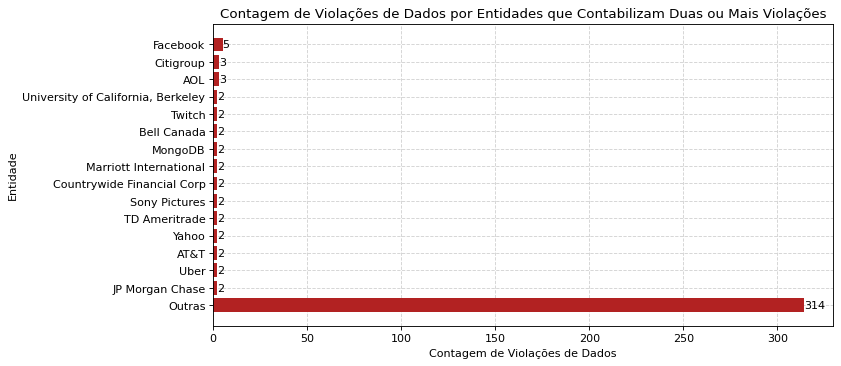

In [16]:
# Excluindo as entidades com uma única violação e atribuindo o resultado a um frame temporário
temp_df = df['entity'].value_counts().reset_index()
temp_df = temp_df[temp_df['entity']>1].rename(columns={'index': 'entidade', 'entity': 'contagem'})

# Contagem de violações das entidades com uma única violação
others = {
    'entidade': ['Outras'],
    'contagem' : [df['entity'].value_counts().sum() - temp_df['contagem'].sum()]
}

# Concatenação da linha "Outras" com as entidades que contabilizam 2 ou mais violações.
new_df = pd.concat([pd.DataFrame.from_dict(others), temp_df.sort_values('contagem', ascending=True)])

# Configurações de plotagem
y=new_df['entidade']
width=new_df['contagem']
title='Contagem de Violações de Dados por Entidades que Contabilizam Duas ou Mais Violações'
xlabel='Contagem de Violações de Dados'
ylabel='Entidade'
grid=True
barlabel=True

# Plotagem através da função auxiliar
univariate_horizontal_barchart(y,width,title,xlabel,ylabel,grid,barlabel)

Considerações
* As 347 violações de dados se dividem entre as 327 entidades distintas existentes neste conjunto de dados;
* A entidade Facebook lidera o gráfico com 5 violações de dados distintas;
* Das 327 entidades, 15 delas possuem duas ou mais violações de dados que é igual a 4,58%;
* As 15 entidades com duas ou mais violações de dados somam 35 violações, representando 10,08% do total.

## Violações de Dados ao Longo dos Anos

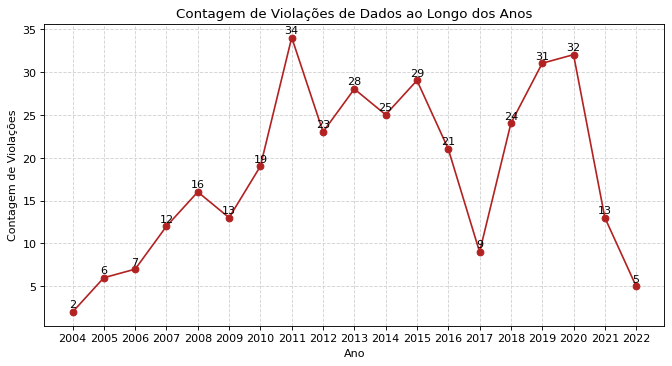

In [244]:
temp_df = df['year'].value_counts().reset_index().rename(columns={'index': 'ano', 'year': 'contagem'})

# Para uma melhor visualização, as violações onde ocorreram em mais de um ano são removidas e é acrescentado
# uma unidade a contagem do ano final da violação

index_list = []
year_list = []

for index,ano in zip(temp_df['ano'].index, temp_df['ano']):
    if len(ano)>4:
        index_list.append(index)
        year_list.append(ano[-4:])
        
for year in year_list:
    # Adiciona uma unidade ao ano corrente
    temp_df.loc[temp_df['ano'] == year,'contagem'] = temp_df[temp_df['ano'] == year]['contagem'] + 1

# Remove os anos concatenados
new_df = temp_df.drop(index_list).sort_values('ano')

# Configuração de plotagem
x = new_df['ano']
y = new_df['contagem']
title = "Contagem de Violações de Dados ao Longo dos Anos"
xlabel = "Ano"
ylabel = "Contagem de Violações"
marker = True
yvaluelabel = True
grid = True

# Plotagem através da função auxiliar
univariate_linechart(x, y, title, xlabel, ylabel, marker, yvaluelabel, grid)

Considerações
* É possível verificar um aumento significativo na quantidade de violações ao longo dos anos, e este fato se dá em detrimento da evolução tecnológica e da informatização de sistemas;
* Também é possível verificar que, nos anos atuais, o número de violações diminui pois as entidades investem em ciber-segurança ao verificarem o valor que os dados oferecem; 
* Neste conjunto de dados, 2011 foi o ano de maior número de violações de dados, aproximadamente 9,79% do número total de violações, seguido de 2020 com 9,22% e 2019 com 8,64%.

## Registros Comprometidos

In [111]:
# Verificando valores que não são convertíveis para o tipo inteiro e adicionando seu indice à uma lista
# Para a realização da análise numérica, estes valores são desconsiderados.
index_list = []
counter = 0
for index, value in zip(df['records'].index, df['records']):
    try:
        int(value)
    except:
        index_list.append(index)
        print(index, '-', value)
        
temp_series = df['records'].drop(index_list).astype('int64')

10 - unknown
25 - unknown
27 - G20 world leaders
28 - 19 years of data
34 - 63 stores
41 - unknown
47 - tens of thousands
48 - over 5,000,000
66 - unknown (client list)
76 - millions
80 - 235 GB
82 - 350 clients emails
94 - 9,000,000 (approx) - basic booking, 2208 (credit card details)
104 - unknown
109 - unknown
119 - Unknown
134 - unknown
140 - unknown
142 - 2.5GB
147 - 250 locations
163 - unknown
168 - 500 locations
175 - 10 locations
185 - unknown
198 - unknown
199 - 93 stores
215 - unknown
220 - unknown
221 - undisclosed
232 - unknown
235 - unknown
243 - unknown
248 - Source Code Compromised
251 - 100 terabytes
260 - 54 locations
265 - 200 stores
286 - 8 locations
288 - unknown
289 - unknown
291 - unknown
294 - unknown
310 - 51 locations
315 - TBC
334 - unknown
336 - unknown


Verificando outliers

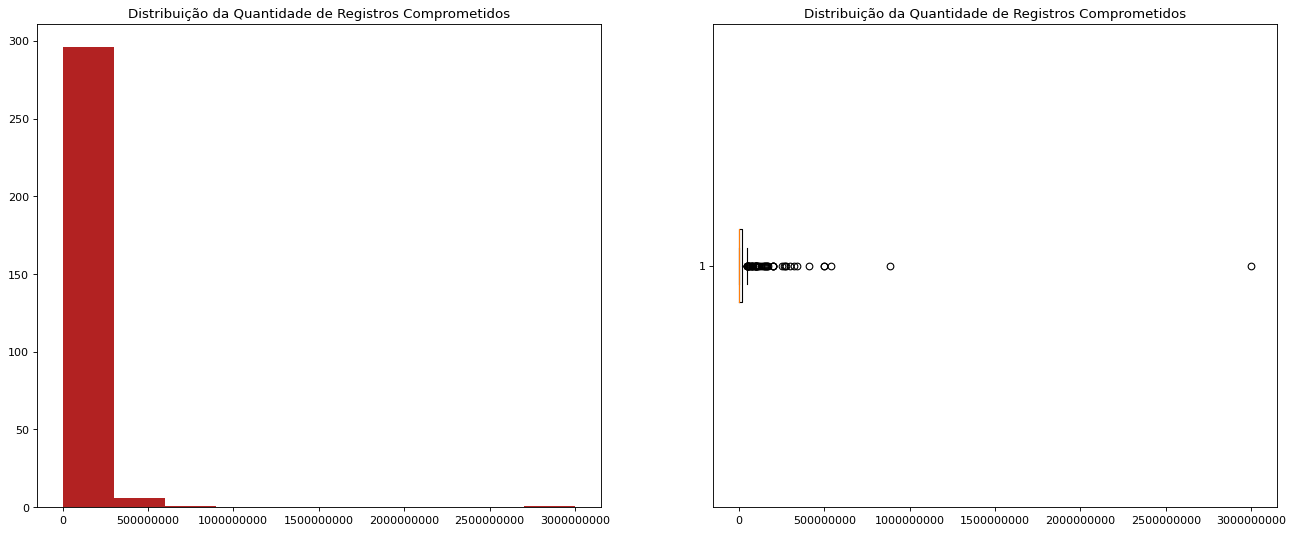

In [180]:
# Verificando outliers através da função auxiliar
univariate_hist_boxplot(temp_series, title='Distribuição da Quantidade de Registros Comprometidos')

A alta discrepancia entre os valores dos dados solicita um tratamento.

In [115]:
# Função auxiliar para remover outliers
def remove_outliers(series):
    
    # Primeiro Quartil e Terceiro Quartil
    q1 = new_series.quantile(0.25)
    q3 = new_series.quantile(0.75)

    # Intervalo Interquartílico
    ii = q3 - q1

    # Limite Inferior (LI) e Limite Superior (LS)
    li = q1-(1.5*ii)
    ls = q3+(1.5*ii)
    
    # Identifica outliers
    outliers = np.where(series<li,True,np.where(series>ls,True,False))
    
    # Remove outliers
    result = series.loc[~(outliers),]
    
    return result

In [183]:
# Removendo outliers através da função auxiliar
new_series = remove_outliers(temp_series)

# Exibição do resultado
print("Número de registros antes da remoção dos outliers:", temp_series.shape[0])
print("Número de registros após remoção dos outliers:", new_series.shape[0])
print("Número total de outliers removidos:", temp_series.shape[0]-new_series.shape[0])

Número de registros antes da remoção dos outliers: 304
Número de registros após remoção dos outliers: 162
Número total de outliers removidos: 142


Função auxiliar para converter números astronômicos (até a casa dos trilhões) em strings de fácil visualização

In [203]:
def converte_num(valor):
    if valor >= 1000000000000:
        return f'{round(valor/1000000000000,2)} Tri'
    elif valor >= 1000000000:
        return f'{round(valor/1000000000,2)} Bi'
    elif valor >= 1000000:
        return f'{round(valor/1000000,2)} Mi'
    elif valor >= 1000:
        return f'{round(valor/1000,2)} Mil'
    else:
        return f'{round(valor)}'

Plotando resultado

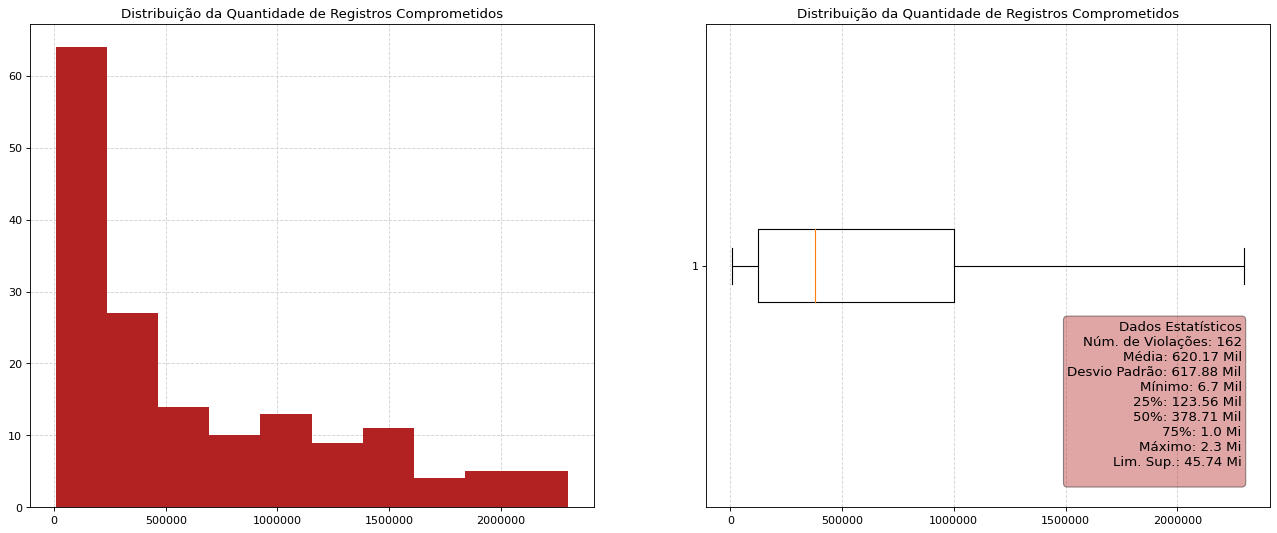

In [211]:
# Configurando Caixa de Texto
text_box = f'''Dados Estatísticos
Núm. de Violações: {converte_num(new_series.describe()[0])}
Média: {converte_num(new_series.describe()[1])}
Desvio Padrão: {converte_num(new_series.describe()[2])}
Mínimo: {converte_num(new_series.describe()[3])}
25%: {converte_num(new_series.describe()[4])}
50%: {converte_num(new_series.describe()[5])}
75%: {converte_num(new_series.describe()[6])}
Máximo: {converte_num(new_series.describe()[7])}
Lim. Sup.: {converte_num(ls)}
'''

# Visualização
univariate_hist_boxplot(new_series, title='Distribuição da Quantidade de Registros Comprometidos', textbox=text_box, grid=True)

Considerações, desconsiderando valores discrepantes:
* Neste conjunto a média de registros comprometidos por violações de dados é igual a 620 mil, com um desvio padrão de 618 mil;
* O maior número de registros comprometidos em uma única violação registrado neste conjunto é igual a 2 milhões de registros;
* 50% das violações resultaram entre 6,7 mil e 378,71 mil registros comprometidos, os outros 50% entre 378,71 mil e 2,3 milhões;
* As violações que revelam acima de 45,74 milhões de registros comprometidos são considerados valores discrepantes;
* O número de registros comprometidos se concentra entre 0 e 500 mil registros.

## Tipo de Entidade/Organização/Empresa

Verificando tipos de organizações únicas

In [212]:
for unique_value in df['organization_type'].unique():
    print(unique_value)

healthcare
social networking
tech
advertising
telecommunications
transport
web
financial
gaming
tech, retail
telecoms
dating
government
academic
retail
educational services
gambling
banking
game
energy
background check
information technology
hosting provider
military
health
consulting, accounting
messaging app
restaurant
financial, credit reporting
data broker
social network
financial service company
Information Security
personal and demographic data about residents and their properties of US
hotel
humanitarian
special public corporation
shopping
local search
mobile carrier
publisher (magazine)
government, healthcare
software
web, military
online shopping
genealogy
media
telecom
QR code payment
fashion
Clinical Laboratory
Question & Answer
web, gaming
government, database
phone accessories
web, tech
Network Monitoring
market analysis
ticket distribution
social media
military, healthcare
Telephone directory
Consumer Goods
government, military
online marketing
arts group
tech, web
variou

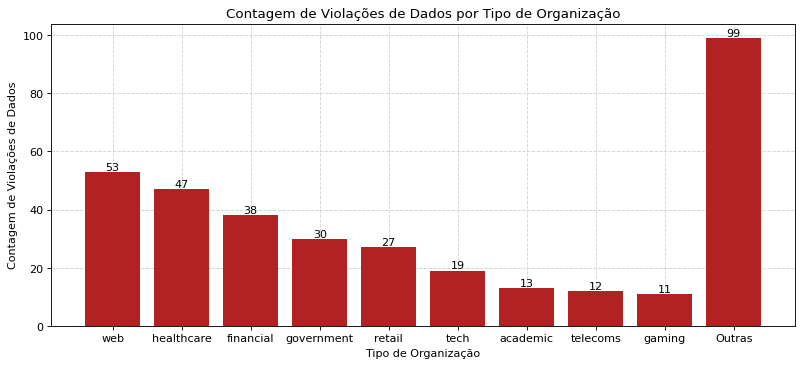

In [213]:
# Transforma o frame original num frame de contagem de tipo de organização
temp_df = df['organization_type'].value_counts().reset_index()
temp_df = temp_df[temp_df['organization_type']>10].rename(columns={'index': 'tipo_de_organizacao', 'organization_type': 'contagem'})

# Cria dicionário para atribuição do valor da contagem restante à linha "Outras"
others = {
    'tipo_de_organizacao': ['Outras'],
    'contagem' : [df['organization_type'].value_counts().sum() - temp_df['contagem'].sum()]
}

# Concatena o frame temporário com a linha "Outras" num novo dataframe
new_df = pd.concat([temp_df,pd.DataFrame.from_dict(others)])

# Exibição do Gráfico de Barras
univariate_barchart(
    x=new_df['tipo_de_organizacao'],
    y=new_df['contagem'],
    title="Contagem de Violações de Dados por Tipo de Organização",
    xlabel="Tipo de Organização",
    ylabel="Contagem de Violações de Dados",
    grid=True,
    barlabel=True,
    fig_width=12
)

Considerações
* As organizações do tipo Web são as que mais sofreram violações de dados bem sucedidas, totabilizando 53 violações distintas, que é equivalente a 15% do valor total de violações;
* Os tipos de organizações com maior número de violações, do mais afetado para o menos afetado, são do tipo Web, Assistência Médica e Financeiro. É possível assimilar os tipos mais afetados ao fato de serem, de forma geral, mais expositivas e mais lucrativas, tornando-os alvo de um maior volume de ataques.

## Métodos de Violações de Dados

Verificando os valores únicos da colunas "metodos" (method)

In [214]:
# Exibe os valores únicos na coluna "method"
for unique_value in df['method'].unique():
    print(unique_value)

hacked
poor security
lost / stolen media
accidentally published
inside job, hacked
lost / stolen computer
unknown
unsecured S3 bucket
inside job
accidentally uploaded
poor security / hacked
Poor security
unprotected api
poor security/inside job
data exposed by misconfiguration
zero-day vulnerabilities
intentionally lost
misconfiguration/poor security
ransomware hacked
rogue contractor
improper setting, hacked
hacked/misconfiguration
publicly accessible Amazon Web Services (AWS) server
accidentally exposed
social engineering


Existem violações de dados que foram realizadas através de mais de um método, e estes estão concatenados em uma única célula no frame, desta forma, estas células devem ser separadas e os respectivos valores incrementados em suas respectivas colunas

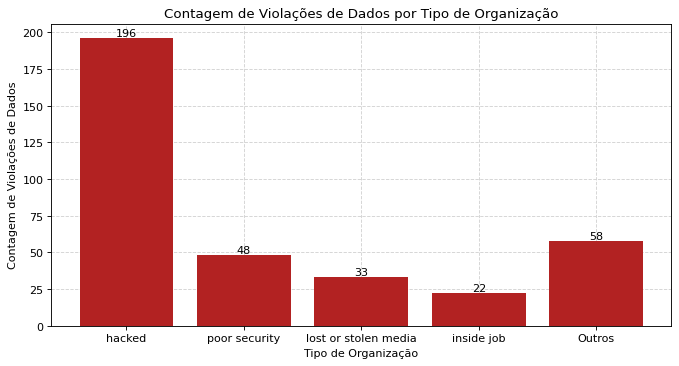

In [215]:
# Separa os métodos concatenados por vírgula (,) ou barra (/) e adiciona numa lista de itens
item_list = []
for value in df['method'].values:
    for item in re.split(',|/', value.lower()):
        item_list.append(item.strip())

# Transforma a lista de itens num frame temporário e concatena o item "lost" nas colunas "stolen media" e "stolen computer". 
temp_df = pd.Series(item_list).value_counts().drop(labels='lost').reset_index().replace('stolen media', 'lost or stolen media').replace('stolen computer', 'lost or stolen computer').set_axis(['metodo', 'contagem'], axis=1, inplace=False)

# É criado um dicionário "Outros" para representar os outros métodos além dos top 4 com maior número de violações
others = {
    'metodo': ['Outros'],
    'contagem' : [temp_df['contagem'].sum() - temp_df.head(4)['contagem'].sum()]
}

# Novo frame da concatenação dos top 4 valores da lista e da linha "Outros"
new_df = pd.concat([temp_df.head(4).sort_values('contagem', ascending=False), pd.DataFrame.from_dict(others)])

# Exibição do Gráfico de Barras
univariate_barchart(
    x=new_df['metodo'],
    y=new_df['contagem'],
    title="Contagem de Violações de Dados por Tipo de Organização",
    xlabel="Tipo de Organização",
    ylabel="Contagem de Violações de Dados",
    grid=True,
    barlabel=True,
)

Considerações
* Do total de 354 violações de dados divididos entre os métodos, 55% ocorreram devido a hackers, sendo o método de maior sucesso na realização de violações de dados;
* Os motivos com maior número de violações são hacking, brechas de segurança, arquivos roubados ou perdidos, e  funcionários dentro da própria organização, sendo 195, 47, 33 e 22 violações respectivamente, o restante é agrupado em 57 outros métodos.

# Análise Exploratória Multivariada

## Funções Auxiliares

In [240]:
def multivariate_barchart(x, y, title, xlabel, ylabel, grid=False, barlabel=False,
                          fig_width=10, fig_heigth=5, dpi=80, barcolor='firebrick'):
    # Definindo subplot
    fig, ax = plt.subplots(figsize=(fig_width,fig_heigth), dpi=dpi)

    # Grafico de barras horizontal
    plt.bar(x, y, color=barcolor)

    # Título e etiquetas do gráfico
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Grade
    if grid:
        ax.set_axisbelow(True)
        plt.grid(linestyle='dashed', color='lightgrey')

    # Etiqueta das barras
    if barlabel:
        ax.bar_label(ax.containers[0], label_type='edge')

    # Exibição
    plt.show()
#multivariate_barchart(df['year'],'test','test','test', barlabel=True)

temp_df = df[['entity', 'year']].value_counts().reset_index().rename(columns={0: 'count'})
temp_df

for year in temp_df['year'].unique():
    print(year)

2019
2018
2011
2020
2008
2010
2013
2015
2016
2009
2012
2014
2021
2022
2007
2006
2017
2005
2004
2014 and 2015
2018-2019
2019-2020


# EM DESENVOLVIMENTO